This is a [jupyter](https://jupyter.org/) notebook that contains text, equations, images and executable code in one document.

# Scattering by a sphere
This notebook shows the sound field of a plane wave scattered by a sphere

In [1]:
%matplotlib inline
from ipywidgets import *
from IPython.display import *
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from scipy.special import spherical_jn, spherical_yn, lpmv
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In order to plot the results in spherical coordinates and in a plane containing the z-axis, we have to set a mesh on an annulus (disk with circular hole) that represents the coordinates in the sound field around the sphere.

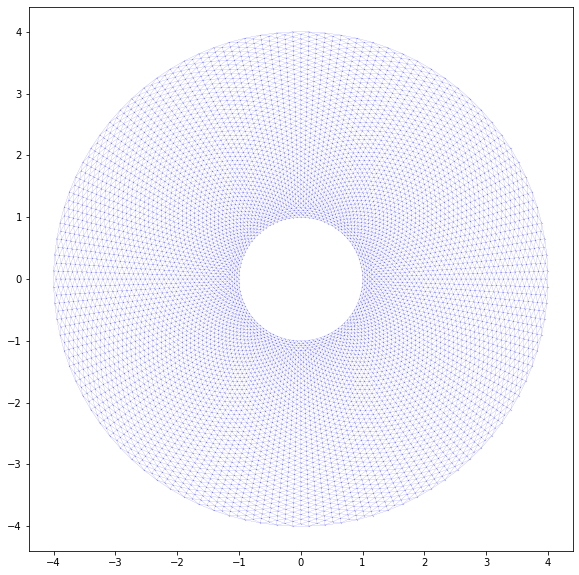

In [2]:
n_angles = 96
n_radii = 80
R = 1 # sphere radius
radii = np.linspace(R, 4*R, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < R*R, 1, 0)
triang.set_mask(mask)

# plot
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.triplot(triang, 'bo-', lw=0.1,ms=0.1);

The sound field is given in form of an infinite series. We plot $N$ elements of the series to test if the series converges. It turn out that just a few elements give good results. 

In [3]:
# He = kR, rho0=1, c=1, v0=1, R=1
@interact(He=(0.1,10,0.1),N=(5,40,5),continuous_update=False)
def plt_field(He=0.1,N=10):
    p = 0
    n = np.arange(N)
    jnp = spherical_jn(n, He, derivative=True)
    ynp = spherical_yn(n, He, derivative=True)    
    p0n = -(-1j)**n * (2*n+1) * jnp/(jnp-1j*ynp)
    for n in np.arange(N):
        hn = np.zeros_like(radii*1j)
        for ind,ra in np.ndenumerate(radii):
            jn = spherical_jn(n, He*ra)
            yn = spherical_yn(n, He*ra)
            hn[ind] = (jn-1j*yn)
        p += p0n[n]*hn*lpmv(0,n,np.cos(angles))
    p = p.flatten()
    p += np.exp(-1j*He*x)
    p = np.abs(p)
    p = 20*np.log10(p)
    plt.gca().set_aspect('equal')
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.tricontourf(triang, p, vmin = -10, vmax = +10,cmap='jet')
    plt.colorbar()
    plt.tricontour(triang, p, colors='k')

interactive(children=(FloatSlider(value=0.1, description='He', max=10.0, min=0.1), IntSlider(value=10, descrip…